In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi
from orbithunter.gluing import rediscretize_fpo_dictionary

In [2]:
figs = '../data/local/thesis/figures/'

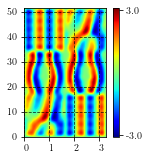

In [30]:
td = read_fpo_set(tileset='resized', rescaled=False, comoving=True)
td = rediscretize_fpo_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
# td[0] = td[0].cell_shift(4, axis=1)
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().transform(to='modes')
tiled_orbit.plot()


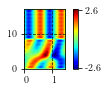

In [31]:
symbol_array = np.array([[0], [1]])
tiled_orbit = tile(symbol_array, td, OrbitKS).reshape().transform(to='modes')
tiled_orbit.plot()

In [32]:
result = converge(tiled_orbit.reshape(16,16), preconditioning=True, pexp=(1,4), verbose=True, method='hybrid')


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 96.7318672354805
Target residual tolerance : 2.56e-07
Maximum iteration number : 4096
Initial guess : OrbitKS({"basis": "modes", "parameters": ["17.1509", "13.0598", "0"], "field_shape": ["16", "16"]})
-------------------------------------------------------------------------------------------------
########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.886079862413174
Target residual tolerance : 2.56e-07
Maximum iteration number : 250
Initial guess : OrbitKS({"basis": "modes", "parameters": ["18.6899", "13.0595", "0"], "field_shape": ["16", "16"]})
-------------------------------------------------------------------------------------------------
#Current Newton step: 1 Current residual = 0.7802623283330299
#Current 

#Current Newton step: 111 Current residual = 0.012209070004981719
#Current Newton step: 112 Current residual = 0.0121939095995391
#Current Newton step: 113 Current residual = 0.012156833931034729
#Current Newton step: 114 Current residual = 0.012136447403628027
#Current Newton step: 115 Current residual = 0.012075087268416468
#Current Newton step: 116 Current residual = 0.011993698327087377
#Current Newton step: 117 Current residual = 0.011644874412526526
#Current Newton step: 118 Current residual = 0.011133901635162122
#Current Newton step: 119 Current residual = 0.011006083384913915
#Current Newton step: 120 Current residual = 0.005428429476696859
#Current Newton step: 121 Current residual = 0.00275084835416097
#Current Newton step: 122 Current residual = 4.428027118451517e-07
Current Newton step: 123 Current residual = 1.800817458314861e-13

Converged. Exiting with residual=1.800817458314861e-13


In [33]:
result.orbit

OrbitKS({"basis": "modes", "parameters": ["191.1102", "11.2624", "0"], "field_shape": ["16", "16"]})

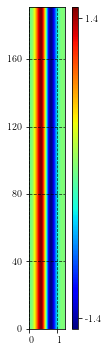

In [34]:
result.orbit.plot()

In [8]:
from orbithunter.ks.arrayops import calculate_spatial_shift

In [9]:
calculate_spatial_shift(rpotest.transform(to='s_modes').state, rpotest.L, n_modes=15) 

NameError: name 'rpotest' is not defined

In [77]:
rpotest = clip(result.orbit, ((None, result.orbit.T/2.),(None, None)), RelativeOrbitKS, frame='physical')

In [90]:
rpotest.S = calculate_spatial_shift(rpotest.transform(to='s_modes').state, rpotest.L, n_modes=15) 

In [91]:
rpotest.frame

'physical'

In [93]:
rpotest.S = -rpotest.S

In [97]:
rpotest = rpotest.change_reference_frame(to='comoving')

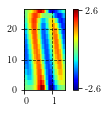

In [100]:
rpotest.plot(padding=False, fundamental_domain=False)

In [103]:
rpo_result = converge(rpotest.transform(to='modes'), method='hybrid', verbose=True, preconditioning=True, pexp=(1,4))


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 0.47647750531243765
Target residual tolerance : 5.12e-07
Maximum iteration number : 8192
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["26.7683", "13.0383", "3.2621"], "field_shape": ["16", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=0.0537139 after 5000 adjoint descent steps. Parameters:(26.769080597220615, 13.038289466970566, 3.3664996921388233)
###############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.0416733521033987
Target residual tolerance : 5.12e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["26.7694", "13.0383", "3.3877"], "f

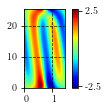

In [105]:
rpo_result.orbit.plot(fundamental_domain=False)

In [101]:
rpotest.residual()

0.47647750531243765

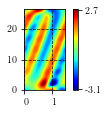

In [60]:
clip(result.orbit, ((None, result.orbit.T/2.),(None, None)), RelativeOrbitKS).plot()


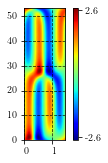

In [54]:
result.orbit.reflection().roll(result.orbit.N//2, axis=0).plot()#residual()

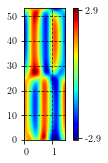

In [57]:
convert_class(result.orbit, ShiftReflectionOrbitKS).plot(fundamental_domain=False)

In [ ]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(10, 10)).astype(int)

In [ ]:
big_tiling = tile(big_symbol_array, td, OrbitKS).reshape(64, 64).transform(to='modes')
big_tiling.plot(show=True, padding=True, padding_shape=(512, 512),
                save=True, filename='big_tiling_initial.pdf',
                directory=figs)

In [4]:
big_tiling_result_gdnoprec = converge(big_tiling, verbose=True)
big_tiling_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='big_tiling.pdf', 
                directory=figs)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 129715.66004208295
Target residual tolerance : 8.192e-06
Maximum iteration number : 131072
Initial guess : OrbitKS({"basis": "modes", "parameters": ["171.5088", "118.9257", "0"], "field_shape": ["64", "128"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=71.3905984 after 5000 adjoint descent steps. Parameters:(172.5011532005447, 154.68683015758037, 0)
#################################################
 Residual=47.1006628 after 10000 adjoint descent steps. Parameters:(173.1182806948519, 156.02838057802015, 0)
#################################################
 Residual=37.6625272 after 15000 adjoint descent steps. Parameters:(173.57579243338688, 156.61591678259862, 0)
#################################################
 Residual=32.302547

KeyboardInterrupt: 

In [ ]:
big_tiling_stripwise = tile(big_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).transform(to='modes')
big_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='big_tiling_stripwise_initial.pdf', 
                directory=figs)

big_tiling_stripwise_result_gdnoprec = converge(big_tiling_stripwise, verbose=True, preconditioning=False)
# big_tiling_stripwise_result_gdnoprec.orbit.to_h5('big_tiling_stripwise.h5', directory='../data/local/thesis/large/')
big_tiling_stripwise_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                                                filename='big_tiling_stripwise.pdf', 
                                                directory=figs)

In [ ]:
datadir = '../data/examples/gluing/'
o0=read_h5('OrbitKS_T41p382_L38p050.h5', directory=datadir).reshape(512,512)
o1=read_h5('OrbitKS_T46p754_L31p245.h5', directory=datadir).reshape(512,512)
o2=read_h5('OrbitKS_T43p819_L34p784.h5', directory=datadir).reshape(512,512)
o3=read_h5('OrbitKS_T36p167_L25p720.h5', directory=datadir).reshape(512,512)

random_orbit_td = {0:o0,1:o1,2:o2,3:o3}

np.random.seed(0)
symbol_array = (4*np.random.rand(10, 10)).astype(int)
random_orbit_tiling = tile(symbol_array, random_orbit_td, OrbitKS, stripwise=False).reshape()

In [ ]:
random_orbit_tiling.plot()

In [ ]:
random_orbit_tiling.plot(filename='random_orbit_tiling_initial.pdf', directory=figs)

In [ ]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='adj', verbose=True)

In [ ]:
random_orbit_tiling_result.orbit.plot(filename='random_orbit_tiling.pdf', directory=figs)

In [ ]:
random_orbit_tiling_result.orbit.plot()

In [ ]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='gmres',
                                      scipy_kwargs={'tol':1e-5, 'maxiter':10, 'restart':50},
                                      preconditioning=True,
                                      verbose=True)

In [ ]:
random_orbit_tiling_result.orbit.plot()

In [ ]:
random_orbit_tiling_result_prec = converge(random_orbit_tiling, method='gmres', scipy_kwargs={'tol':1e-3},
                                      verbose=True, preconditioning=True)

In [ ]:
test = read_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

In [ ]:
shd = shadowing(td[1].reshape(32,32), test.reshape(1024,1024))

In [ ]:
from orbithunter.physics_ks import shadowing

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()
td[0].plot()
td[1].plot()
td[2].plot()

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(tileset='space_padded')
td = rediscretize_tiling_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().transform(to='modes')
tiled_orbit.plot()

In [ ]:
# fig, axes = plt.subplots(1, 2)
# ax1, ax2 = axes.flatten()
# orbits = (tiled_orbit, result.orbit)
# for ax, plot_orbit in zip(axes, orbits):
#     plot_orbit = plot_orbit.transform(to='field')
#     xticks, xlabels, yticks, ylabels = generate_axes_labels(plot_orbit)
#     image = ax.imshow(plot_orbit.transform(to='field').state, extent=[0, plot_orbit.L, 0, plot_orbit.T],
#                           cmap='jet', interpolation='none', aspect='auto')
#     # Include custom ticks and tick labels
#     ax.set_xticks(xticks)
#     ax.set_yticks(yticks)
#     ax.set_xticklabels(xlabels, ha='left')
#     ax.set_yticklabels(ylabels, va='center')
#     ax.grid(True, linestyle='dashed', color='k', alpha=0.8)

    
# # Custom colorbar values
# maxu = round(np.max(plot_orbit.state.ravel()) - 0.1, 2)
# minu = round(np.min(plot_orbit.state.ravel()) + 0.1, 2)

# cbarticks = [minu, maxu]
# cbarticklabels = [str(i) for i in np.round(cbarticks, 1)]
# fig.subplots_adjust(right=0.95)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=0.075, pad=0.1)
# cbar = plt.colorbar(image, cax=cax, ticks=cbarticks)
# cbar.ax.set_yticklabels(cbarticklabels)
# plt.show()

In [ ]:
bigstrip = read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big/')
bigstrip.plot(filename='big_tiling_strip.pdf', directory=figs)

In [ ]:
big = read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big/')
big.plot(filename='big_tiling.pdf', directory=figs)

In [ ]:
read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big').plot()
big_tiling.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='OrbitKS_big_tiling_initial.pdf', 
                directory='../data/local/testing/')

In [ ]:
read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big').plot()

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/thesis/')
big_tiling_result_minres.orbit.plt('big_tiling_result.pdf', directory='../data/local/thesis/figures')

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_minres.orbit.plot()

In [ ]:
big_tiling_result_gdnoprec = converge(big_tiling, verbose=True, preconditioning=False)
big_tiling_result_gdnoprec.orbit.to_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_gdnoprec.orbit.plot(padding=True)

In [ ]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(10, 10)).astype(int)
big_tiling_stripwise = tile(big_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).transform(to='modes')
big_tiling_stripwise.to_h5(filename='OrbitKS_big_tiling_stripwise_initial.h5', directory='../data/local/testing/')
big_tiling_stripwise.plot(show=False, padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.png', directory='../data/local/testing/')
big_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres = converge(big_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_big_tiling_stripwise_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres.orbit.plot(padding=True)

In [ ]:
big_tiling_stripwise_result_gd = converge(big_tiling_stripwise, verbose=True)
big_tiling_stripwise_result_gd.orbit.to_h5('OrbitKS_big_tiling_stripwise_gd.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_gd.orbit.plot()

In [ ]:
np.random.seed(432)
symbol_array = 3*np.random.rand(30, 30).astype(int)
huge_tiling = tile(symbol_array, td, OrbitKS).reshape(512, 512).transform(to='modes')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))

np.random.seed(432)
symbol_array = (3*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).transform(to='modes')

huge_tiling_stripwise.to_h5(filename='OrbitKS_huge_tiling_stripwise_10_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres = converge(huge_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_huge_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.png', directory='../data/local/testing/', padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.pdf', directory='../data/local/testing/', show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
shift = m.S
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise_comoving = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).transform(to='modes')

huge_tiling_stripwise_comoving.to_h5(filename='OrbitKS_huge_tiling_comoving_stripwise_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres = converge(huge_tiling_stripwise_comoving, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_comoving_result_minres.orbit.to_h5('OrbitKS_huge_tiling_comoving_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.png',
                                                        directory='../data/local/testing/',
                                                        padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.pdf',
                                                        directory='../data/local/testing/',
                                                        show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
tdl = tdr.copy()
td_dict = {0: tdl, 1: tdr, 2: td}

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

full_tiling_with_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

full_tiling_with_local_shifts.plot()

tiling_with_local_shifts = full_tiling_with_local_shifts.reshape(256, 512)

tiling_with_local_shifts.plot()

tiling_with_local_shifts.to_h5(filename='OrbitKS_huge_tiling_local_velocity_initial.h5', directory='../data/local/testing/')
tiling_with_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.png', directory='../data/local/testing/')
tiling_with_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.pdf', directory='../data/local/testing/')

tiling_with_local_shifts_result_minres = converge(tiling_with_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
tiling_with_local_shifts_result_minres.orbit.to_h5('OrbitKS_huge_tiling_local_velocity_minres.h5', directory='../data/local/testing/')

tiling_local_velocity_phase2 = tiling_with_local_shifts_result_minres.orbit

tiling_local_velocity_phase2.plot(show=False, padding=True, padding_shape=(2048, 2048), 
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.png', 
                                            directory='../data/local/testing/')
tiling_local_velocity_phase2.plot(padding=True, padding_shape=(2048, 2048),
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.pdf',
                                            directory='../data/local/testing/')

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))



local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

major_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

major_local_shifts.to_h5(filename='OrbitKS_major_local_shifts_initial.h5', directory='../data/local/testing/')
major_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_initial.png', directory='../data/local/testing/')
major_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_initial.pdf', directory='../data/local/testing/')

major_local_shifts = major_local_shifts.reshape(256, 512)

major_local_shifts_minres = converge(major_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
major_local_shifts_minres.orbit.to_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

major_local_shifts_minres.orbit.to_h5(filename='OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_minres.png', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_minres.pdf', directory='../data/local/testing/')

In [ ]:
td = tile_dictionary_ks(padding='spacetime')

In [ ]:
478/(2*pi*np.sqrt(2))

In [ ]:
for o in td.values():
    o.plot()

In [ ]:
leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
leftslant = read_h5('RelativeOrbitKS_T8p892_L13p096.h5', 
                    directory='../data/local/continuation/merge_tile_coarse/').reshape(256,256)
rightslant = leftslant.reflection()

leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
reqv_local_shift = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

In [ ]:
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048))

In [ ]:
reqv_local_shift.to_h5(filename='OrbitKS_reqv_local_shift_initial.h5', directory='../data/local/testing/')
reqv_local_shift.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift_initial.png', directory='../data/local/testing/')
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift_initial.pdf', directory='../data/local/testing/')

In [ ]:
reqv_local_shift = reqv_local_shift.reshape(256, 512)

In [ ]:
reqv_local_shift_minres = converge(reqv_local_shift, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
reqv_local_shift_minres.orbit.to_h5('reqv_local_shift_minres.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres_gd = converge(reqv_local_shift_minres.orbit, verbose=True, orbit_maxiter=250000, preconditioning=False)
reqv_local_shift_minres_gd.orbit.to_h5('reqv_local_shift_minres_gd.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres.orbit.to_h5(filename='OrbitKS_reqv_local_shift.h5', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift.png', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift.pdf', directory='../data/local/testing/')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

local_tiles = []
for s in range(10,):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
local_tiles = []
for s in range(10, 40):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padding='spacetime')
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

rpoleft = read_h5('RelativeOrbitKS_L13p106_T8p646.h5').reshape(256, 256)
rporight = rpoleft.reflection()
rpoleft = convert_class(rpoleft.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rporight = convert_class(rporight.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())


tdl = td.copy()
tdl[0] = leftslant
tdl[1] = rpoleft
tdl[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, -td[2].L/2))

tdr = td.copy()
tdr[0] = rightslant
tdr[1] = rporight
tdr[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, td[2].L/2))

td_dict = {0: tdl, 1: tdr, 2: td}

test = tdl[2].change_reference_frame(to='physical').state.copy()
tdl[2] = OrbitKS(state=test+1, parameters=tdl[2].parameters, basis='field')

test = tdr[2].change_reference_frame(to='physical').state.copy()
tdr[2] = OrbitKS(state=test-1, parameters=tdr[2].parameters, basis='field')

local_tiles = []
for s in range(10, 60):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(5, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(3*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

rpo_tiling_orbit = glue(np.array(local_tiles).reshape(-1,10), RelativeOrbitKS, stripwise=True, 
                        nonzero_parameters=True, gluing_order=(1,0)).reshape(256, 256)

In [ ]:
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048,2048), fundamental_domain=False)

In [ ]:
preconditioning=False
methods = 'adj'
rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes'), verbose=True, method=methods)

In [ ]:
rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_{}.h5').format(methods),
                        directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename=('OrbitKS_rpo_tiling_orbit_{}.png').format(methods),
                       directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename=('OrbitKS_rpo_tiling_orbit_{}.pdf').format(methods), 
                       directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_orbit.to_h5(filename='OrbitKS_rpo_tiling_orbit_initial.h5', directory='../data/local/testing/')
rpo_tiling_orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_orbit_initial.png', directory='../data/local/testing/')
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_orbit_initial.pdf', directory='../data/local/testing/')

for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes').reshape(512, 512), verbose=True, maxiter=1,
                                                   method='adj', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')
    
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')

In [ ]:
for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes').reshape(256, 512), verbose=True, maxiter=1,
                                                   method='gmres', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')